## Problem Statement:


- You operate an online store with a substantial daily visitor count.

- However, a small fraction of these visitors make purchases, and many don't return.

- Current marketing efforts are distributed uniformly to all visitors, but you're eager to harness machine learning to identify and target high-value prospects effectively.

## About The DataSet

- This dataset we will be using contains a day's worth of visitor interactions on your site.

- Each row corresponds to a unique customer, identified by UserID. The columns encompass various features like device usage, website actions (e.g., adding products, signing in), and user status (new or returning).

- Kaggle Link : https://www.kaggle.com/datasets/benpowis/customer-propensity-to-purchase-data?select=testing_sample.csv


## Objective

- The primary goal is to employ machine learning to predict customer propensity to purchase ('ordered').

- Key objectives include understanding which website interactions drive successful orders, building a predictive model for high-value prospect identification, optimizing marketing resource allocation, and tailoring strategies for different visitor segments.

- Ultimately, the aim is to utilize machine learning insights to boost conversion rates, optimize marketing spending, and enhance overall online store efficiency.


## Importing necessary libraries

In [ ]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


warnings.filterwarnings('ignore')

## Downloading the datasets from goole drive

In [ ]:
!gdown https://drive.google.com/uc?id=1JkVPa0GDqGH7dhIxpzZk3qH5ie0rKXDT

Downloading...
From: https://drive.google.com/uc?id=1JkVPa0GDqGH7dhIxpzZk3qH5ie0rKXDT
To: /content/training_sample.csv
100% 38.7M/38.7M [00:01<00:00, 32.7MB/s]


## Loading dataset in a pandas dataframe

In [ ]:
df = pd.read_csv("/content/training_sample.csv")
print(df.shape)


(455401, 25)


## Visualizing top 5 rows

In [ ]:
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


## Checking all column names

In [ ]:
df.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

## Checking the datatypes used

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

## Descriptive statistics

In [ ]:
df.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

## Data Cleaning

- Checking duplicates
- Checking missing values

## Checking Duplicates

In [ ]:
df[df.duplicated()]

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered


## Checking missing values

In [ ]:
df.isnull().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

<Axes: >

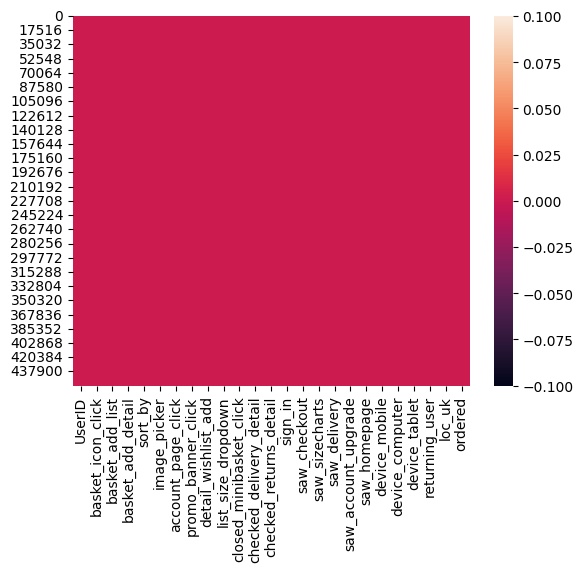

In [ ]:
sns.heatmap(df.isnull())

## Univariate, Bivariate & Multivariate Analysis

In [ ]:
df['UserID'].value_counts()

a720-6b732349-a720-4862-bd21-644732    1
22d3-59b23c76-22d3-4074-a767-183814    1
4c88-59b3d7a2-4c88-4c62-96b0-32243     1
7739-59b3c969-7739-4c7a-80cd-94167     1
0477-59b39376-0477-4b56-843d-931365    1
                                      ..
074a-ac239517-074a-46a4-ab7c-192772    1
7819-ac2356dc-7819-4bb0-83aa-398482    1
0418-ac235007-0418-4b0b-a8b4-96811     1
8468-ac22c648-8468-b164-8707-727029    1
7aav-06d7bd20-7aav-411b-bc9c-325055    1
Name: UserID, Length: 455401, dtype: int64

In [ ]:
df.drop('UserID', axis=1, inplace=True)
print(df.shape)

(455401, 24)


## Visualizing the target column

## Function To Create Piechart In Plotly

In [ ]:
def create_piechart(df, cat_col, title= "",
                    explode_value=None, colors=None):

  plt.figure(figsize=(8, 6))
  plt.pie(x=df["frequency"], labels = df[cat_col],
          autopct = "%.1f%%", colors = colors,
          explode = explode_value)
  plt.title(title)
  plt.legend()
  plt.show()

### Function To Create Univariate Bargraphs

In [ ]:
def create_univariate_bargraph(df, xaxis_col, yaxis_col,
                               title = "", color=None):
  plt.figure(figsize=(8, 6))
  sns.barplot(data=df, x = xaxis_col, y=yaxis_col, palette=color)
  plt.title(title)
  plt.show()

## Function To Create Univariate Frequency Counts

In [ ]:
def univariate_freq_count(df, cat_col):
  frequency_df = df[cat_col].value_counts().to_frame().reset_index()
  frequency_df.columns = [cat_col, 'frequency']
  return frequency_df

## Function To Create Bivariate Counts

In [ ]:
def bivariate_frequency_count_df(df, target_col, effect_col, generated_cols = None):

    new_df = pd.crosstab(df[target_col], df[effect_col]).reset_index(drop=False)
    if generated_cols != None:
        new_df.columns = generated_cols
    new_df.sort_values(by = effect_col, ascending=False, inplace = True)

    new_df = new_df.reset_index(drop = True)
    return new_df


## Function To Create Bivariate Graphs Using Plotly

In [ ]:
def bivariate_vertical_layout(df, target_col, legend_x, legend_y, bar_width, bar_height):

    layout = go.Layout(
      xaxis_tickmode="array",
      xaxis_tickvals=list(range(50)),
      xaxis_ticktext=tuple(df[target_col].values),
      legend=dict(
          x=legend_x,
          y=legend_y),
      showlegend=True,
      font=dict(size=14),
      width=bar_width,
      height=bar_height,
      margin=dict(l=0, r=0, b=0, t=30),
    )
    return layout

In [ ]:
def bivariate_horizontal_layout(df, target_col, legend_x, legend_y, bar_width, bar_height):

    layout = go.Layout(
      yaxis_tickmode="array",
      yaxis_tickvals=list(range(50)),
      yaxis_ticktext=tuple(df[target_col].values),
      legend=dict(
          x=legend_x,
          y=legend_y),
      showlegend=True,
      font=dict(size=14),
      width=bar_width,
      height=bar_height,
      margin=dict(l=0, r=0, b=0, t=30),
    )
    return layout


In [ ]:
def create_bivariate_bargraph(df, colors, legend_labels, columns,
                              target_col, graph_orientation, bar_width, bar_height,
                              legend_x, legend_y, fig_title,
                              x_axis_title, y_axis_title):
    barplots = []
    target_values = df[target_col]
    target_indexes = list(range(len(target_values)))
    if graph_orientation == "v":
        for i in range(len(columns)):
            barplots.append(go.Bar(x = target_values[target_indexes],
            y = df[columns[i]], orientation = graph_orientation,
            name=legend_labels[i],
            text = df[columns[i]],
            marker=go.bar.Marker(color=colors[i])))
        layout = bivariate_vertical_layout(df, target_col, legend_x, legend_y, bar_width, bar_height)
    else:
        for i in range(len(columns)):
            barplots.append(go.Bar(x = df[columns[i]],
            y = target_values[target_indexes], orientation = graph_orientation,
            name=legend_labels[i],
            text = df[columns[i]],
            marker=go.bar.Marker(color=colors[i])))
        layout = bivariate_horizontal_layout(df, target_col, legend_x, legend_y, bar_width, bar_height)

    # Make the multi-bar plot
    fig = go.Figure(data=barplots, layout=layout)
    fig.update_layout(title_text = fig_title)
    fig.update_xaxes(title_text=x_axis_title)
    fig.update_yaxes(title_text=y_axis_title)
    fig.show()


## EDA (Univariate & Bivariate Analysis)

### Research Questions

- Does viewing delivery details influence the likelihood of ordering?

- How does seeing the checkout page relate to the conversion rate?

- Does clicking the basket icon impact the probability of ordering?

- Is there a connection between adding items to the basket and making a purchase?

- Does encountering the homepage affect the chances of conversion?

- Does using the list size dropdown correlate with ordering behavior?

- Does clicking the minibasket contribute to higher conversion rates?

- Are visitors who complete an order more likely to return to the website?

- Is there a connection between visitor actions and cart abandonment?

- Can interactions with the homepage predict valuable prospects?

In [ ]:
target_df = univariate_freq_count(df=df, cat_col = "ordered")
target_df.head()

,ordered,frequency
0,0,436308
1,1,19093


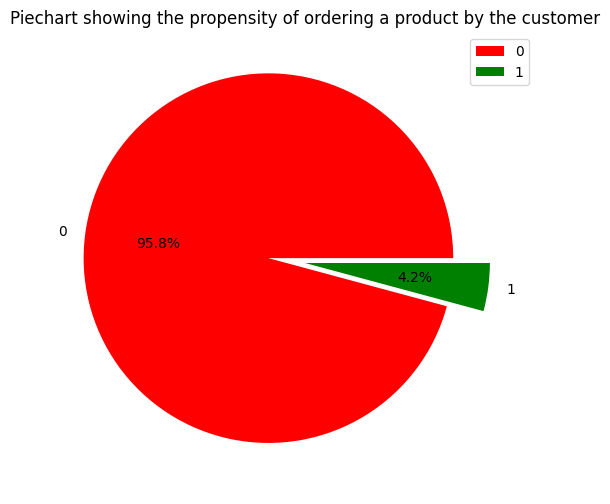

In [ ]:
create_piechart(df = target_df, cat_col = "ordered",
                title= "Piechart showing the propensity of ordering a product by the customer",
                explode_value=[0.2, 0], colors=["red", "green"])

In [ ]:
df.columns

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

## Checked_delivery_detail column

In [ ]:
delivery_check_df = univariate_freq_count(df=df, cat_col = "checked_delivery_detail")
delivery_check_df.head()

,checked_delivery_detail,frequency
0,0,426768
1,1,28633


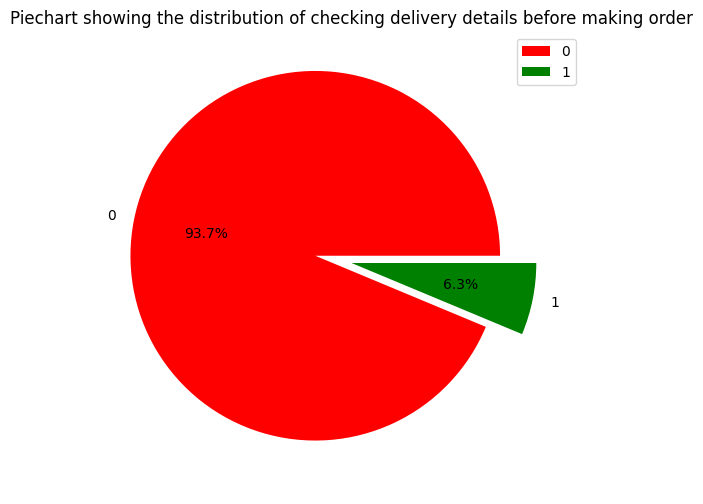

In [ ]:
create_piechart(df = delivery_check_df, cat_col = "checked_delivery_detail",
                title= "Piechart showing the distribution of checking delivery details before making order",
                explode_value=[0.2, 0], colors=["red", "green"])

**1) Does viewing delivery details influence the likelihood of ordering?**

In [ ]:
delivery_for_propensity = bivariate_frequency_count_df(df = df,
                                                      target_col = 'checked_delivery_detail',
                                                      effect_col = 'ordered',
                                                       generated_cols = ['checked_delivery_detail',
                                                                         'not_ordered',
                                                                          'ordered']
                                                         )


delivery_for_propensity.sort_values(by = "ordered", ascending=True, inplace = True)
delivery_for_propensity = delivery_for_propensity.reset_index(drop = True)
delivery_for_propensity = delivery_for_propensity[["checked_delivery_detail", "not_ordered", "ordered"]]
delivery_for_propensity

,checked_delivery_detail,not_ordered,ordered
0,0,426571,197
1,1,9737,18896


In [ ]:
create_bivariate_bargraph(delivery_for_propensity,
                          ["red", "green"], legend_labels = ['not_ordered', 'ordered'],
                          columns = ['not_ordered', 'ordered'],
                          target_col = 'checked_delivery_detail', graph_orientation = 'v',
                          bar_width = 600, bar_height = 500,
                          legend_x = 0.74, legend_y = 0.999,
                          fig_title = "Impact Of Viewing Delivery Details On Ordering Products",
                          x_axis_title = "Delivery Details Checked by customers",
                          y_axis_title = "Number Of customers")

## saw_checkout column

In [ ]:
saw_checkout_df = univariate_freq_count(df=df, cat_col = "saw_checkout")
saw_checkout_df.head()

,saw_checkout,frequency
0,0,418930
1,1,36471


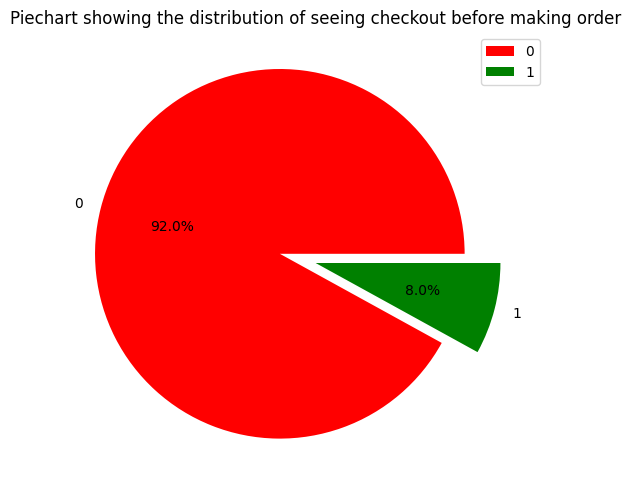

In [ ]:
create_piechart(df = saw_checkout_df, cat_col = "saw_checkout",
                title= "Piechart showing the distribution of seeing checkout before making order",
                explode_value=[0.2, 0], colors=["red", "green"])

**2) How does seeing the checkout page relate to the conversion rate?**


In [ ]:
checkout_view_for_propensity = bivariate_frequency_count_df(df = df,
                                                      target_col = 'saw_checkout',
                                                      effect_col = 'ordered',
                                                       generated_cols = ['saw_checkout',
                                                                         'not_ordered',
                                                                          'ordered']
                                                         )


checkout_view_for_propensity.sort_values(by = "ordered", ascending=True, inplace = True)
checkout_view_for_propensity = checkout_view_for_propensity.reset_index(drop = True)
checkout_view_for_propensity = checkout_view_for_propensity[["saw_checkout", "not_ordered", "ordered"]]
checkout_view_for_propensity

,saw_checkout,not_ordered,ordered
0,0,418930,0
1,1,17378,19093


In [ ]:
create_bivariate_bargraph(checkout_view_for_propensity,
                          ["red", "green"], legend_labels = ['not_ordered', 'ordered'],
                          columns = ['not_ordered', 'ordered'],
                          target_col = 'saw_checkout', graph_orientation = 'v',
                          bar_width = 600, bar_height = 500,
                          legend_x = 0.74, legend_y = 0.999,
                          fig_title = "Impact Of Checkout Views On Ordering Products",
                          x_axis_title = "Checkout Views by customers",
                          y_axis_title = "Number Of customers")

## Basket icon click

In [ ]:
basket_icon_click_df = univariate_freq_count(df=df, cat_col = "basket_icon_click")
basket_icon_click_df.head()

,basket_icon_click,frequency
0,0,410248
1,1,45153


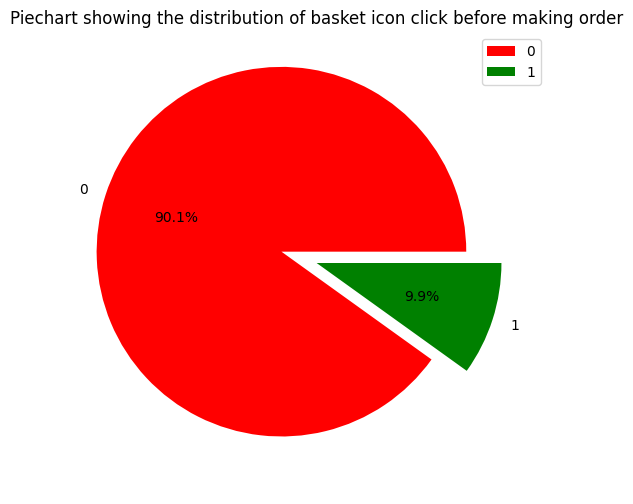

In [ ]:
create_piechart(df = basket_icon_click_df, cat_col = "basket_icon_click",
                title= "Piechart showing the distribution of basket icon click before making order",
                explode_value=[0.2, 0], colors=["red", "green"])

**3) Does clicking the basket icon impact the probability of ordering?**


In [ ]:
click_basket_icon_for_propensity = bivariate_frequency_count_df(df = df,
                                                      target_col = 'basket_icon_click',
                                                      effect_col = 'ordered',
                                                       generated_cols = ['basket_icon_click',
                                                                         'not_ordered',
                                                                          'ordered']
                                                         )


click_basket_icon_for_propensity.sort_values(by = "ordered", ascending=True, inplace = True)
click_basket_icon_for_propensity = click_basket_icon_for_propensity.reset_index(drop = True)
click_basket_icon_for_propensity = click_basket_icon_for_propensity[["basket_icon_click", "not_ordered", "ordered"]]
click_basket_icon_for_propensity

,basket_icon_click,not_ordered,ordered
0,0,404732,5516
1,1,31576,13577


In [ ]:
create_bivariate_bargraph(click_basket_icon_for_propensity,
                          ["red", "green"], legend_labels = ['not_ordered', 'ordered'],
                          columns = ['not_ordered', 'ordered'],
                          target_col = 'basket_icon_click', graph_orientation = 'v',
                          bar_width = 600, bar_height = 500,
                          legend_x = 0.74, legend_y = 0.999,
                          fig_title = "Impact Of Clicking On Basket Icons On Ordering Products",
                          x_axis_title = "Clicking Basket Icons by customers",
                          y_axis_title = "Number Of customers")

## basket_add_detail column

In [ ]:
basket_add_detail_df = univariate_freq_count(df=df, cat_col = "basket_add_detail")
basket_add_detail_df.head()

,basket_add_detail,frequency
0,0,403979
1,1,51422


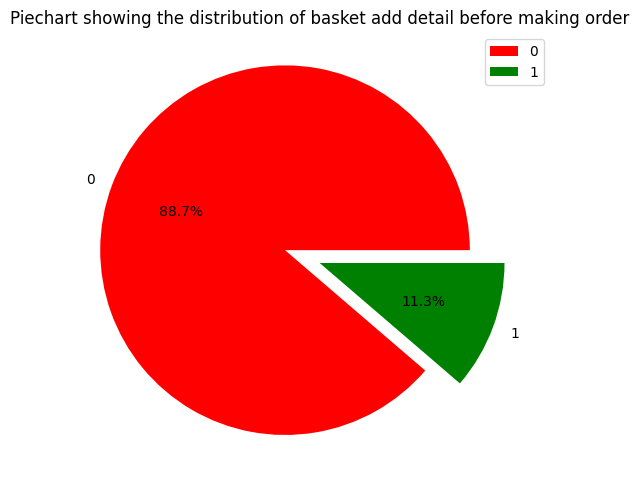

In [ ]:
create_piechart(df = basket_add_detail_df, cat_col = "basket_add_detail",
                title= "Piechart showing the distribution of basket add detail before making order",
                explode_value=[0.2, 0], colors=["red", "green"])

**4. Is there a connection between adding details to the basket and making a purchase?**


In [ ]:
basket_add_detail_for_propensity = bivariate_frequency_count_df(df = df,
                                                      target_col = 'basket_add_detail',
                                                      effect_col = 'ordered',
                                                       generated_cols = ['basket_add_detail',
                                                                         'not_ordered',
                                                                          'ordered']
                                                         )


basket_add_detail_for_propensity.sort_values(by = "ordered", ascending=True, inplace = True)
basket_add_detail_for_propensity = basket_add_detail_for_propensity.reset_index(drop = True)
basket_add_detail_for_propensity = basket_add_detail_for_propensity[["basket_add_detail", "not_ordered", "ordered"]]
basket_add_detail_for_propensity

,basket_add_detail,not_ordered,ordered
0,0,399013,4966
1,1,37295,14127


In [ ]:
create_bivariate_bargraph(basket_add_detail_for_propensity,
                          ["red", "green"], legend_labels = ['not_ordered', 'ordered'],
                          columns = ['not_ordered', 'ordered'],
                          target_col = 'basket_add_detail', graph_orientation = 'v',
                          bar_width = 600, bar_height = 500,
                          legend_x = 0.74, legend_y = 0.999,
                          fig_title = "Impact Of Adding Details on a basket On Ordering Products",
                          x_axis_title = "Adding Details on a basket by customers",
                          y_axis_title = "Number Of customers")

## basket_add_list column

In [ ]:
basket_add_list_df = univariate_freq_count(df=df, cat_col = "basket_add_list")
basket_add_list_df.head()

,basket_add_list,frequency
0,0,421464
1,1,33937


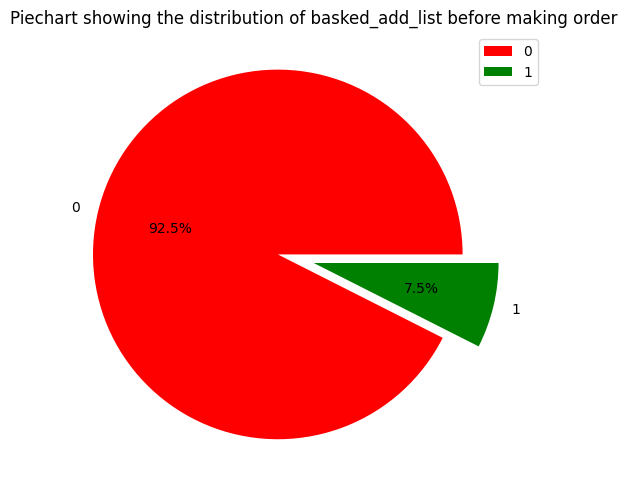

In [ ]:
create_piechart(df = basket_add_list_df, cat_col = "basket_add_list",
                title= "Piechart showing the distribution of basked_add_list before making order",
                explode_value=[0.2, 0], colors=["red", "green"])

**5. Is there a connection between adding basket list and making a purchase?**


In [ ]:
basket_add_list_for_propensity = bivariate_frequency_count_df(df = df,
                                                      target_col = 'basket_add_list',
                                                      effect_col = 'ordered',
                                                       generated_cols = ['basket_add_list',
                                                                         'not_ordered',
                                                                          'ordered']
                                                         )


basket_add_list_for_propensity.sort_values(by = "ordered", ascending=False, inplace = True)
basket_add_list_for_propensity = basket_add_list_for_propensity.reset_index(drop = True)
basket_add_list_for_propensity = basket_add_list_for_propensity[["basket_add_list", "not_ordered", "ordered"]]
basket_add_list_for_propensity

,basket_add_list,not_ordered,ordered
0,0,410689,10775
1,1,25619,8318


In [ ]:
create_bivariate_bargraph(basket_add_list_for_propensity,
                          ["red", "green"], legend_labels = ['not_ordered', 'ordered'],
                          columns = ['not_ordered', 'ordered'],
                          target_col = 'basket_add_list', graph_orientation = 'v',
                          bar_width = 600, bar_height = 500,
                          legend_x = 0.74, legend_y = 0.999,
                          fig_title = "Impact Of Adding Basket List On Ordering Products",
                          x_axis_title = "Adding Basket list by customers",
                          y_axis_title = "Number Of customers")

## saw_homepage column

In [ ]:
saw_homepage_df = univariate_freq_count(df=df, cat_col = "saw_homepage")
saw_homepage_df.head()

,saw_homepage,frequency
0,0,323324
1,1,132077


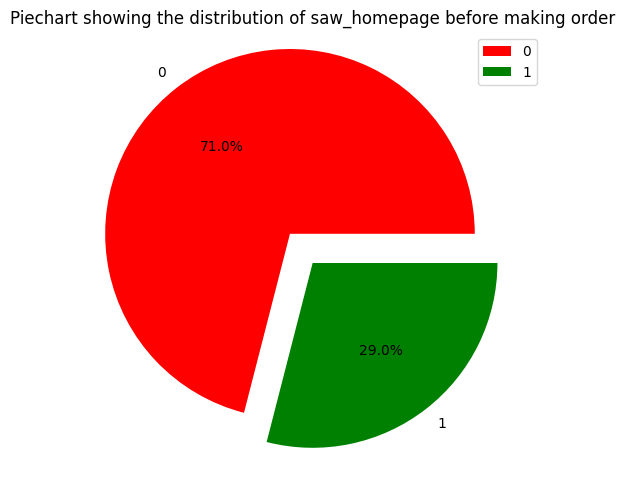

In [ ]:
create_piechart(df = saw_homepage_df, cat_col = "saw_homepage",
                title= "Piechart showing the distribution of saw_homepage before making order",
                explode_value=[0.2, 0], colors=["red", "green"])

**6) Does encountering the homepage affect the chances of conversion?**

In [ ]:
saw_homepage_for_propensity = bivariate_frequency_count_df(df = df,
                                                      target_col = 'saw_homepage',
                                                      effect_col = 'ordered',
                                                       generated_cols = ['saw_homepage',
                                                                         'not_ordered',
                                                                          'ordered']
                                                         )


saw_homepage_for_propensity.sort_values(by = "ordered", ascending=True, inplace = True)
saw_homepage_for_propensity = saw_homepage_for_propensity.reset_index(drop = True)
saw_homepage_for_propensity = saw_homepage_for_propensity[["saw_homepage", "not_ordered", "ordered"]]
saw_homepage_for_propensity

,saw_homepage,not_ordered,ordered
0,0,316303,7021
1,1,120005,12072


In [ ]:
create_bivariate_bargraph(saw_homepage_for_propensity,
                          ["red", "green"], legend_labels = ['not_ordered', 'ordered'],
                          columns = ['not_ordered', 'ordered'],
                          target_col = 'saw_homepage', graph_orientation = 'v',
                          bar_width = 600, bar_height = 500,
                          legend_x = 0.74, legend_y = 0.999,
                          fig_title = "Impact Of Encountering a homepage On Ordering Products",
                          x_axis_title = "Has customers encountered a home page?",
                          y_axis_title = "Number Of customers")

## list_size_dropdown

In [ ]:
list_size_dropdown_df = univariate_freq_count(df=df, cat_col = "list_size_dropdown")
list_size_dropdown_df.head()

,list_size_dropdown,frequency
0,0,350494
1,1,104907


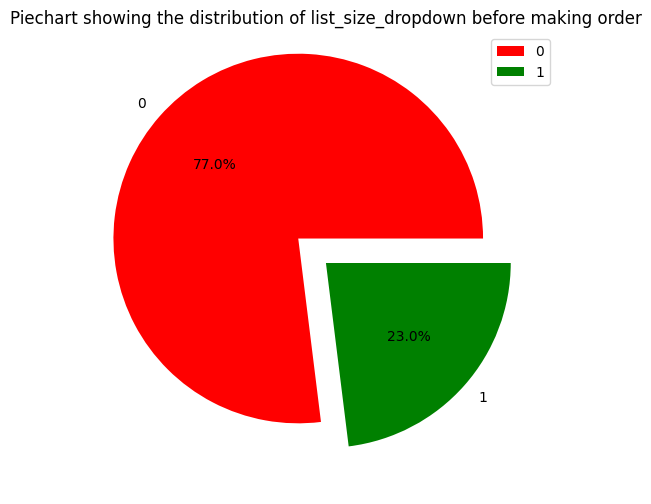

In [ ]:
create_piechart(df = list_size_dropdown_df, cat_col = "list_size_dropdown",
                title= "Piechart showing the distribution of list_size_dropdown before making order",
                explode_value=[0.2, 0], colors=["red", "green"])

## closed_minibasket_click

In [ ]:
closed_minibasket_click_df = univariate_freq_count(df=df, cat_col = "closed_minibasket_click")
closed_minibasket_click_df.head()

,closed_minibasket_click,frequency
0,0,447533
1,1,7868


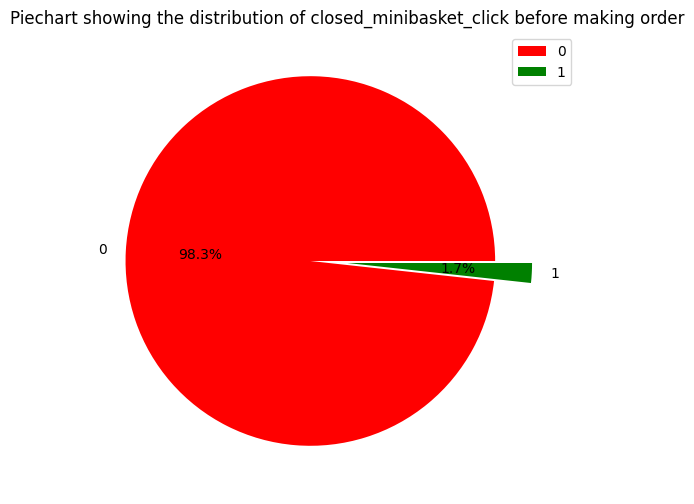

In [ ]:
create_piechart(df = closed_minibasket_click_df, cat_col = "closed_minibasket_click",
                title= "Piechart showing the distribution of closed_minibasket_click before making order",
                explode_value=[0.2, 0], colors=["red", "green"])

## Hypothesis Testing To Find The Relationship Between Predictor Variables & the Target Variable

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
feature_columns = [col for col in list(df.columns) if col!="ordered"]

In [ ]:
def perform_chi_squared_tests(df, target_column, alpha=0.05):
    """
    Perform chi-squared tests for independence between binary categorical features and a binary target variable.

    Args:
        train_df (pd.DataFrame): The training DataFrame containing the features and target.
        feature_columns (list): List of feature column names to be tested.
        target_column (str): Name of the target column.
        alpha (float): Significance level for hypothesis testing.

    Returns:
        dict: A dictionary with chi-squared test results for each feature.
    """
    results = {}
    feature_columns = [col for col in df.columns if col != target_column]

    for feature in feature_columns:
        contingency_table = pd.crosstab(df[feature], df[target_column])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        results[feature] = {'Chi-Square': chi2, 'p-value': p}

        print(f"Feature: {feature}")
        print(f"Chi-Square Statistic: {chi2}")
        print(f"P-value: {p}")

        if p < alpha:
            print("Reject the null hypothesis (H0)")
            print(f"There is evidence of an association between {feature} and {target_column}.")
        else:
            print("Fail to reject the null hypothesis (H0)")
            print(f"There is no evidence of an association between {feature} and {target_column}.")

        print()

    return results


chi_squared_results = perform_chi_squared_tests(df, 'ordered', alpha=0.05)

Feature: basket_icon_click
Chi-Square Statistic: 83545.33172621123
P-value: 0.0
Reject the null hypothesis (H0)
There is evidence of an association between basket_icon_click and ordered.

Feature: basket_add_list
Chi-Square Statistic: 37679.69404987946
P-value: 0.0
Reject the null hypothesis (H0)
There is evidence of an association between basket_add_list and ordered.

Feature: basket_add_detail
Chi-Square Statistic: 78205.71290161685
P-value: 0.0
Reject the null hypothesis (H0)
There is evidence of an association between basket_add_detail and ordered.

Feature: sort_by
Chi-Square Statistic: 1357.9652794984515
P-value: 2.8626137386010465e-297
Reject the null hypothesis (H0)
There is evidence of an association between sort_by and ordered.

Feature: image_picker
Chi-Square Statistic: 2325.3968503871774
P-value: 0.0
Reject the null hypothesis (H0)
There is evidence of an association between image_picker and ordered.

Feature: account_page_click
Chi-Square Statistic: 1489.334224279247
P-va

## Is there a relationship between Independent Features

In [ ]:
chi_squared_results = perform_chi_squared_tests(df, 'basket_icon_click', alpha=0.05)

Feature: basket_add_list
Chi-Square Statistic: 99171.90165279582
P-value: 0.0
Reject the null hypothesis (H0)
There is evidence of an association between basket_add_list and basket_icon_click.

Feature: basket_add_detail
Chi-Square Statistic: 127890.75493293826
P-value: 0.0
Reject the null hypothesis (H0)
There is evidence of an association between basket_add_detail and basket_icon_click.

Feature: sort_by
Chi-Square Statistic: 2426.6014343038255
P-value: 0.0
Reject the null hypothesis (H0)
There is evidence of an association between sort_by and basket_icon_click.

Feature: image_picker
Chi-Square Statistic: 3127.423452724204
P-value: 0.0
Reject the null hypothesis (H0)
There is evidence of an association between image_picker and basket_icon_click.

Feature: account_page_click
Chi-Square Statistic: 1489.5383581185174
P-value: 0.0
Reject the null hypothesis (H0)
There is evidence of an association between account_page_click and basket_icon_click.

Feature: promo_banner_click
Chi-Square 

In [ ]:
df.corr()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
basket_icon_click,1.000000,0.466671,0.529947,0.073016,0.082893,0.057253,0.109342,0.044153,0.291608,0.323940,...,0.008741,0.052922,0.030764,0.203087,0.016203,-0.001757,-0.006019,0.126640,0.018518,0.428334
basket_add_list,0.466671,1.000000,0.340968,0.106852,0.061462,0.028994,0.096608,0.019061,0.469625,0.208082,...,0.004161,0.030286,0.018150,0.180221,-0.017202,0.016629,0.015516,0.057443,0.018797,0.287666
basket_add_detail,0.529947,0.340968,1.000000,0.085854,0.124230,0.037502,0.109043,0.050724,0.247205,0.222444,...,0.008101,0.048410,0.024255,0.175138,-0.018800,0.032794,-0.001799,0.057680,0.030956,0.414420
sort_by,0.073016,0.106852,0.085854,1.000000,0.185661,-0.009754,0.058155,0.024056,0.124273,0.028453,...,0.006196,0.028102,0.012194,0.128205,-0.278043,0.269589,0.078088,0.010366,-0.051148,0.054636
image_picker,0.082893,0.061462,0.124230,0.185661,1.000000,-0.007182,0.046968,0.039412,0.074726,0.024515,...,0.005710,0.031267,0.008912,0.074698,-0.235542,0.241681,0.050471,0.002085,-0.041662,0.071492
account_page_click,0.057253,0.028994,0.037502,-0.009754,-0.007182,1.000000,0.014474,0.013251,0.016912,0.033595,...,0.008158,0.048095,0.026949,0.073538,0.038549,-0.025294,-0.017028,0.016550,-0.001389,0.057279
promo_banner_click,0.109342,0.096608,0.109043,0.058155,0.046968,0.014474,1.000000,0.031775,0.097991,0.056917,...,0.000998,0.024616,0.017825,0.073477,-0.032351,0.035099,0.007879,0.019168,-0.018817,0.056533
detail_wishlist_add,0.044153,0.019061,0.050724,0.024056,0.039412,0.013251,0.031775,1.000000,0.038497,0.030591,...,0.000713,0.013570,0.008133,0.033563,-0.009750,0.014493,0.002081,0.013149,-0.010889,0.023516
list_size_dropdown,0.291608,0.469625,0.247205,0.124273,0.074726,0.016912,0.097991,0.038497,1.000000,0.140700,...,0.001118,0.028138,0.015929,0.235547,-0.008991,-0.012537,0.036213,0.100140,-0.002313,0.154867
closed_minibasket_click,0.323940,0.208082,0.222444,0.028453,0.024515,0.033595,0.056917,0.030591,0.140700,1.000000,...,0.005080,0.021881,0.012418,0.077102,-0.000571,-0.028121,0.040407,0.052852,0.015351,0.140011


## Creating a dictionary to get the correlation value with the target feature to identify the strength of relationship

In [ ]:
target = "ordered"
correlation_dict = {}
features = [col for col in df.columns if col != target]
for feature in features:
  corr_value = df[[feature, target]].corr()[target][feature]
  if feature not in correlation_dict:
    correlation_dict[feature] = corr_value

correlation_dict


{'basket_icon_click': 0.42833413861922537,
 'basket_add_list': 0.28766577029482215,
 'basket_add_detail': 0.4144196974680833,
 'sort_by': 0.05463595626961505,
 'image_picker': 0.07149207527001225,
 'account_page_click': 0.05727907823623062,
 'promo_banner_click': 0.05653265976470382,
 'detail_wishlist_add': 0.023516495875068547,
 'list_size_dropdown': 0.15486702260107563,
 'closed_minibasket_click': 0.14001140109485957,
 'checked_delivery_detail': 0.7987204780500137,
 'checked_returns_detail': 0.059483723447421755,
 'sign_in': 0.6655557350054894,
 'saw_checkout': 0.7089855655971137,
 'saw_sizecharts': 0.007548032977578842,
 'saw_delivery': 0.03146089469930921,
 'saw_account_upgrade': 0.025857456809585067,
 'saw_homepage': 0.15777764891529364,
 'device_mobile': -0.04290650799236685,
 'device_computer': 0.04920837919891546,
 'device_tablet': 0.016939244059895497,
 'returning_user': 0.06029455422758261,
 'loc_uk': 0.03164269702641328}

## Creating a correlation dataframe from correlation dict

In [ ]:
correlation_df = pd.DataFrame({"features" : correlation_dict.keys(),
                               "strength": correlation_dict.values()})

In [ ]:
correlation_df = correlation_df.sort_values("strength", ascending=False).reset_index(drop=True)



In [ ]:
selected_features = list(correlation_df["features"][:9])
selected_features.append("ordered")
print(selected_features)


['checked_delivery_detail', 'saw_checkout', 'sign_in', 'basket_icon_click', 'basket_add_detail', 'basket_add_list', 'saw_homepage', 'list_size_dropdown', 'closed_minibasket_click', 'ordered']


In [ ]:
final_df = df[selected_features]
print(final_df.shape)


(455401, 10)


In [ ]:
final_df.corr()

,checked_delivery_detail,saw_checkout,sign_in,basket_icon_click,basket_add_detail,basket_add_list,saw_homepage,list_size_dropdown,closed_minibasket_click,ordered
checked_delivery_detail,1.000000,0.653109,0.621738,0.405787,0.404134,0.264766,0.147041,0.151981,0.130958,0.798720
saw_checkout,0.653109,1.000000,0.930027,0.458774,0.456713,0.297681,0.187156,0.159885,0.148010,0.708986
sign_in,0.621738,0.930027,1.000000,0.478834,0.461659,0.312276,0.195701,0.170406,0.153448,0.665556
basket_icon_click,0.405787,0.458774,0.478834,1.000000,0.529947,0.466671,0.203087,0.291608,0.323940,0.428334
basket_add_detail,0.404134,0.456713,0.461659,0.529947,1.000000,0.340968,0.175138,0.247205,0.222444,0.414420
basket_add_list,0.264766,0.297681,0.312276,0.466671,0.340968,1.000000,0.180221,0.469625,0.208082,0.287666
saw_homepage,0.147041,0.187156,0.195701,0.203087,0.175138,0.180221,1.000000,0.235547,0.077102,0.157778
list_size_dropdown,0.151981,0.159885,0.170406,0.291608,0.247205,0.469625,0.235547,1.000000,0.140700,0.154867
closed_minibasket_click,0.130958,0.148010,0.153448,0.323940,0.222444,0.208082,0.077102,0.140700,1.000000,0.140011
ordered,0.798720,0.708986,0.665556,0.428334,0.414420,0.287666,0.157778,0.154867,0.140011,1.000000


## Since 'saw_checkout' and 'sign_in' features are highly correlated with each other, it is better to drop any one of them.

In [ ]:
final_df.drop("sign_in", axis=1, inplace=True)
print(final_df.shape)

(455401, 9)


## Model Creation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Prepare data for training

In [ ]:
data = final_df.drop('ordered', axis=1)
labels = final_df['ordered']

## Train Test Split

## Seeding for reproducability of results

In [ ]:
np.random.seed(42)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = labels)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(364320, 8)
(364320,)
(91081, 8)
(91081,)


In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
log_reg.coef_

array([[ 5.85115066,  7.98316359,  0.32125625,  0.46076797,  0.37342204,
         0.25716041, -0.12317104,  0.18048441]])

In [ ]:
predictions = log_reg.predict(x_test)

In [ ]:
confusion_matrix(y_test, predictions)

array([[86670,   592],
       [   36,  3783]])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87262
           1       0.86      0.99      0.92      3819

    accuracy                           0.99     91081
   macro avg       0.93      0.99      0.96     91081
weighted avg       0.99      0.99      0.99     91081



In [ ]:
confusion_matrix(y_test, predictions)

array([[86670,   592],
       [   36,  3783]])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87262
           1       0.86      0.99      0.92      3819

    accuracy                           0.99     91081
   macro avg       0.93      0.99      0.96     91081
weighted avg       0.99      0.99      0.99     91081



## Handling class imbalance problem with class_weights

In [ ]:
n_classes = len(y_train.unique())

In [ ]:
w0 = y_train.shape[0]/(n_classes* y_train[y_train == 0].shape[0])
w1 = y_train.shape[0]/(n_classes* y_train[y_train == 1].shape[0])

In [ ]:
print("w0 is {}".format(w0))
print("w1 is {}".format(w1))

w0 is 0.521879637640884
w1 is 11.926149011391908


In [ ]:
class_weight={0: w0, 1: w1}

In [ ]:
log_reg = LogisticRegression(class_weight=class_weight)

In [ ]:
log_reg.fit(x_train, y_train)

LogisticRegression(class_weight={0: 0.521879637640884, 1: 11.926149011391908})

In [ ]:
log_reg.coef_

array([[ 5.89712495, 10.0840224 ,  0.70225497,  0.55898718,  0.66218902,
         0.13595183, -0.35236278,  0.0958034 ]])

In [ ]:
predictions = log_reg.predict(x_test)

In [ ]:
confusion_matrix(y_test, predictions)

array([[86661,   601],
       [   36,  3783]])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87262
           1       0.86      0.99      0.92      3819

    accuracy                           0.99     91081
   macro avg       0.93      0.99      0.96     91081
weighted avg       0.99      0.99      0.99     91081

